## Tarea 04: Análisis de Fourier - ciclos solares

### Alejando Mesa y Yennifer Angarita

## Ciclos del Sol

Procedimiento:

1. Lea el archivo TSI2.txt y genere una matriz de datos. 
2. Grafique los datos. La primera columna corresponde a años, la segunda a W/m^2.
3. Realice la TF de los datos. Grafique la amplitud.
4. Identifique la o las frecuencias más importantes. No incluya las frecuencias cercanas a cero.
5. Determine el o los ciclos principales del Sol en años.
6. Mejore la resolución en el espectro de frecuencias y mire si aparece nueva información.
7. Saque conclusiones de los resultados.

In [1]:
import numpy as np
import matplotlib
import pylab as plt
import scipy.misc as pim
from scipy import stats

% matplotlib inline
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

###### Lectura y grafica de los datos de 'TSI2.tx'

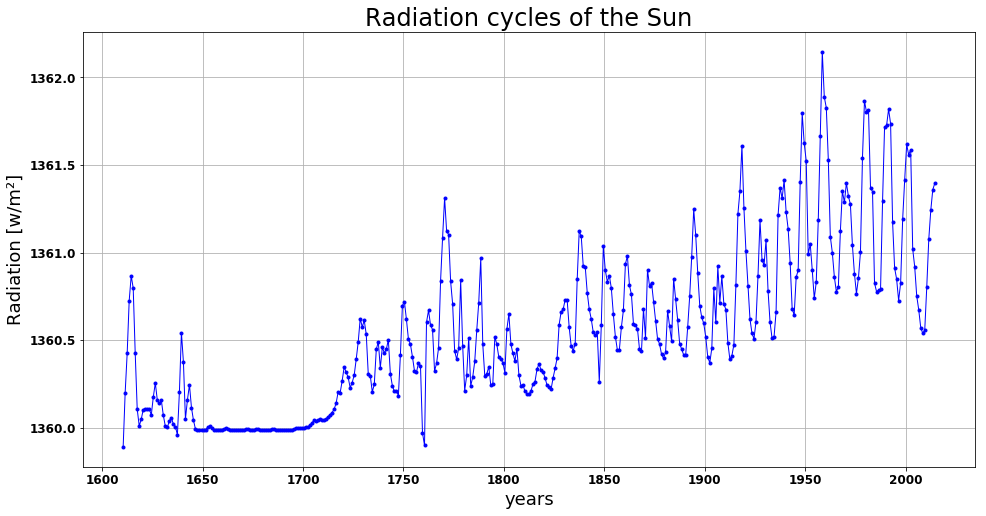

In [2]:
x,y = np.loadtxt('TSI2.txt', usecols=[0,1], dtype='float', unpack='True',delimiter=None)

plt.figure(figsize=(16,8))
plt.plot(x,y,marker='.',color='blue',linewidth=1,markersize=6)
plt.title('Radiation cycles of the Sun', fontsize=24)
plt.xlabel('years', fontsize=18)
plt.ylabel('Radiation [w/m²]', fontsize=18)
plt.grid()

###### Transformada de fourier de los datos

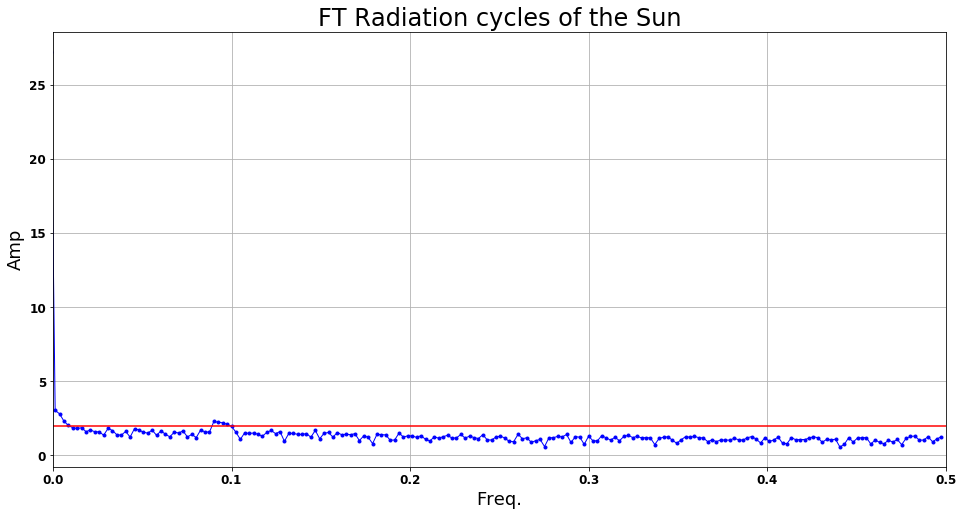

In [3]:
dy = 1
fty = np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))*dy
v = np.arange(-1/(2*dy),1/(2*dy),1/(dy*x.size))
ti = 0
tf =0.5

plt.figure(figsize=(16,8))
plt.plot(v,abs(fty)**(1/4),marker='.',color='blue',linewidth=1,markersize=6)
plt.plot((0, 0.5), (2, 2), 'r-')
plt.title('FT Radiation cycles of the Sun', fontsize=24)
plt.xlabel('Freq.', fontsize=18)
plt.ylabel('Amp', fontsize=18)
plt.xlim(ti,tf)
plt.grid()


## Análisis

De la grafica de amplitudes, conforme la frecuencia  se aleja del cero, se observa un maximo aproximadamente en $f\approx0.09$, el cual siguiendo la formula $$T=\frac{1}{f}$$
Se obtiene un periodo de $T\approx 11.11 [years]$ el cual es concordante con el ciclo de actividad solar medido por medio de las manchas solares, el cual tiene una duracion de aproximadamente 11 años.

##### Mejore la resolución en el espectro de frecuencias 

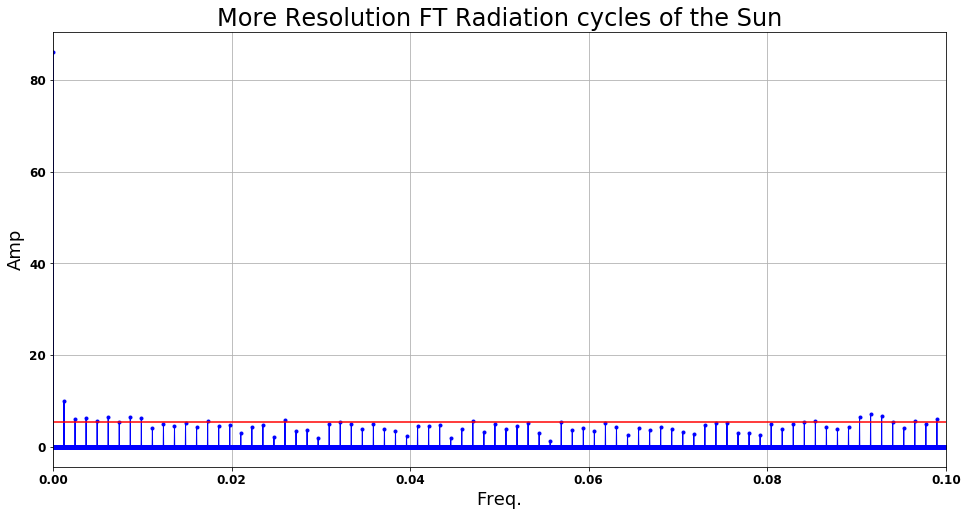

In [4]:
yinv=y[::-1] #Invertir el orden de los datos del arreglo
yinv=yinv[1:]  #Eliminar primer elemento del nuevo arreglo
yinv=yinv[:-1] #Eliminar ultimo elemento del nuevo arreglo

yf=[] 
k=0
while k<50: #Ciclo while para meter en un arreglo los valores de la señal, la inversa de la señal en el tiempo el numero que deseemos repertila
    for i in range(0,len(y)):
        yf.append(y[i])#Señal
    #print len(data3)
    for i in range(0,len(yinv)):#Señal invertida en el tiempo
        yf.append(yinv[i])
    k+=1
    
dy = 1
t1 = np.arange(0,len(yf),dy)

fty2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(yf)))*dy
v = np.arange(-1/(2*dy),1/(2*dy),1/(dy*t1.size))
ti = 0
tf =0.1

plt.figure(figsize=(16,8))
plt.plot(v,abs(fty2)**(1/4),marker='.',color='blue',linewidth=1,markersize=6)
plt.plot((0, 0.1), (5.5, 5.5), 'r-')
plt.title('More Resolution FT Radiation cycles of the Sun', fontsize=24)
plt.xlabel('Freq.', fontsize=18)
plt.ylabel('Amp', fontsize=18)
plt.xlim(ti,tf)
plt.grid()

## Análisis
Al mejorar la resolución, se hayan nuevos valores cercanos al pico de $f \approx0.09$, asumiendo que los valores más cercanos al 0 generan picos de ruido, se decide tomar el pico en $f \approx 0.0120$ el cual, aplicando la ecuacion anterior, arroja un valor de $T \approx 83.33$. Este preiodo se halla dentro del ciclo de Gleissberg, el cual tiene un periodo de $T = 85 \pm 15$ el cual tuvo su ultimo máximo, aproximadamente en 1960 (más o menos visible en la primera grafica) 

## Conclusión

en la gráfica de los datos, es fácil evidenciar un ciclo de actividad  de 11 años, al realizar la transformada de Fourier, este ciclo es el más fácil de evidenciar por encima del ruido, sin embargo al aumentar la resolución en este espacio, se pueden detectar nuevos ciclos, como es el caso del ciclo de Gleissberg el cual no es detectable a simple vista en el estudio de los datos originales más sin embargo, describen el comportamiento real del Sol.
Por lo tanto, el Análisis de Fourier, permite hallar patrones o comportamientos en la información que resultan casi invisibles bajo un estudio tradicional de los datos.